In [1]:
# !pip install xgboost


In [2]:
# !pip show imbalanced-learn
# !pip show scikit-learn


In [3]:
# !pip install --upgrade scikit-learn imbalanced-learn


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [5]:
Data=pd.read_csv("MD_data.csv")

In [6]:
Data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,24.56,Yes,No,No,20,15.0,No,Female,50-54,Hispanic,No,Yes,Good,6,No,No,No
1,No,30.23,No,No,No,0,0.0,No,Female,75-79,White,No,Yes,Excellent,7,No,No,No
2,No,29.12,Yes,No,No,0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7,Yes,No,No
3,Yes,30.23,No,No,No,0,0.0,No,Female,80 or older,White,No,Yes,Very good,8,No,No,No
4,No,20.81,Yes,No,Yes,0,0.0,No,Male,65-69,White,No,Yes,Fair,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59063,Yes,21.93,Yes,No,No,20,0.0,No,Female,70-74,White,Yes,Yes,Fair,4,Yes,No,Yes
59064,No,24.68,Yes,No,No,0,0.0,Yes,Male,80 or older,White,No,Yes,Very good,6,No,No,Yes
59065,Yes,20.38,No,No,No,5,4.0,No,Female,65-69,White,No,Yes,Good,7,No,No,No
59066,No,25.86,Yes,No,No,30,0.0,Yes,Male,65-69,White,No,No,Good,7,No,No,Yes


# Inspect the Dataset

In [7]:
Data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,24.56,Yes,No,No,20,15.0,No,Female,50-54,Hispanic,No,Yes,Good,6,No,No,No
1,No,30.23,No,No,No,0,0.0,No,Female,75-79,White,No,Yes,Excellent,7,No,No,No
2,No,29.12,Yes,No,No,0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7,Yes,No,No
3,Yes,30.23,No,No,No,0,0.0,No,Female,80 or older,White,No,Yes,Very good,8,No,No,No
4,No,20.81,Yes,No,Yes,0,0.0,No,Male,65-69,White,No,Yes,Fair,8,No,No,No


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59068 entries, 0 to 59067
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      59068 non-null  object 
 1   BMI               59068 non-null  float64
 2   Smoking           59068 non-null  object 
 3   AlcoholDrinking   59068 non-null  object 
 4   Stroke            59068 non-null  object 
 5   PhysicalHealth    59068 non-null  int64  
 6   MentalHealth      59040 non-null  float64
 7   DiffWalking       59068 non-null  object 
 8   Sex               59068 non-null  object 
 9   AgeCategory       59068 non-null  object 
 10  Race              59068 non-null  object 
 11  Diabetic          59068 non-null  object 
 12  PhysicalActivity  59068 non-null  object 
 13  GenHealth         59059 non-null  object 
 14  SleepTime         59068 non-null  int64  
 15  Asthma            59068 non-null  object 
 16  KidneyDisease     59068 non-null  object

In [9]:
Data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,59068.000000,59068.000000,59040.000000,59068.000000
mean,28.571367,5.281658,4.221528,7.137282
std,6.415493,9.842607,8.439989,1.601112
min,12.210000,0.000000,0.000000,1.000000
25%,24.250000,0.000000,0.000000,6.000000
50%,27.460000,0.000000,0.000000,7.000000
75%,31.750000,5.000000,4.000000,8.000000
max,83.330000,30.000000,30.000000,24.000000


In [10]:
print(Data.isnull().sum())

HeartDisease         0
BMI                  0
Smoking              0
AlcoholDrinking      0
Stroke               0
PhysicalHealth       0
MentalHealth        28
DiffWalking          0
Sex                  0
AgeCategory          0
Race                 0
Diabetic             0
PhysicalActivity     0
GenHealth            9
SleepTime            0
Asthma               0
KidneyDisease        0
SkinCancer           0
dtype: int64


# Data Visulization

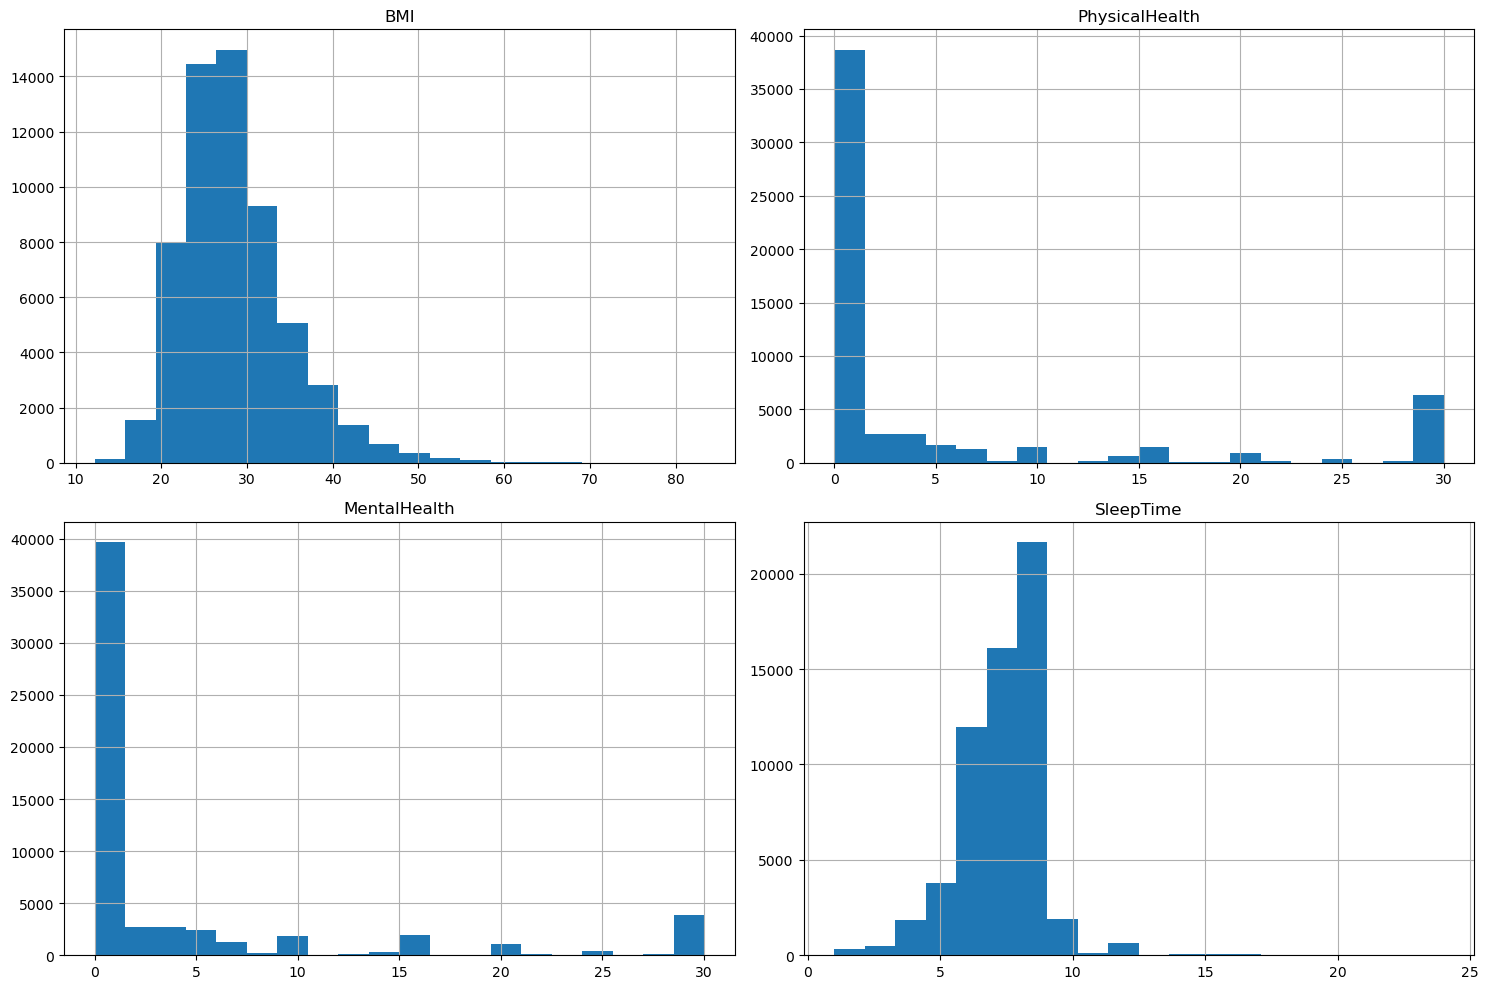

In [11]:
Data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [12]:
#In a correlation matrix, negative values indicate an inverse relationship between two variables. 
#This means that as one variable increases, the other tends to decrease.

C:\Users\PC\AppData\Local\Temp\ipykernel_8908\4178020250.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Data.corr()


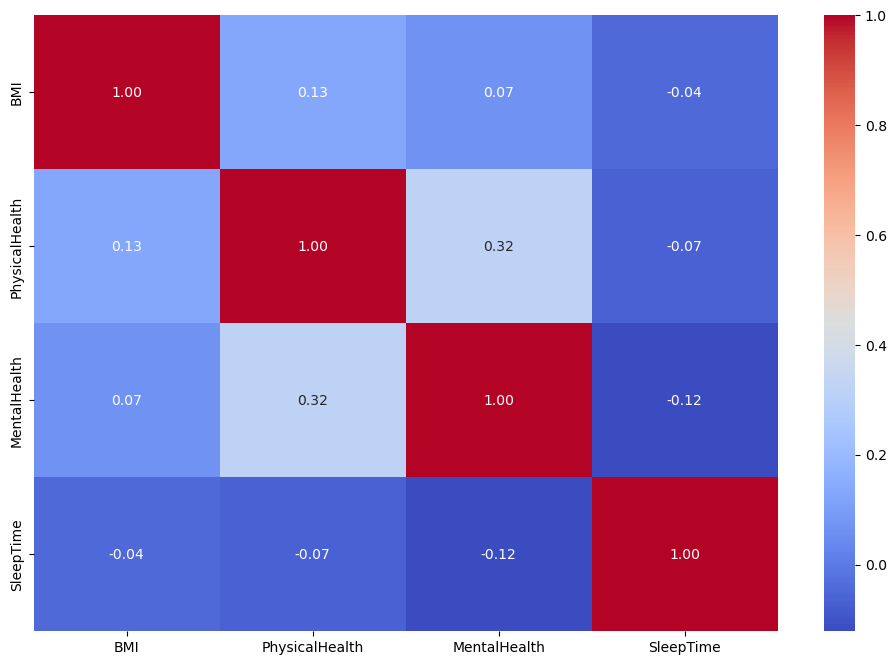

In [13]:
correlation_matrix = Data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


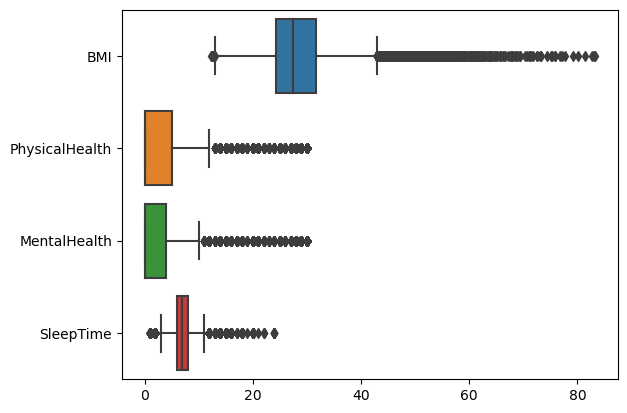

In [14]:

sns.boxplot(data=Data, orient="h")
plt.show()

# Handle Missing Values


In [15]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from scipy import stats

In [16]:
original_columns = Data.columns

# Handle missing values using SimpleImputer (strategy='most_frequent')
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = imputer.fit_transform(Data)


In [17]:
# Convert back to DataFrame with original column names
data = pd.DataFrame(data_imputed, columns=original_columns)


In [18]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,24.56,Yes,No,No,20,15.0,No,Female,50-54,Hispanic,No,Yes,Good,6,No,No,No
1,No,30.23,No,No,No,0,0.0,No,Female,75-79,White,No,Yes,Excellent,7,No,No,No
2,No,29.12,Yes,No,No,0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7,Yes,No,No
3,Yes,30.23,No,No,No,0,0.0,No,Female,80 or older,White,No,Yes,Very good,8,No,No,No
4,No,20.81,Yes,No,Yes,0,0.0,No,Male,65-69,White,No,Yes,Fair,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59063,Yes,21.93,Yes,No,No,20,0.0,No,Female,70-74,White,Yes,Yes,Fair,4,Yes,No,Yes
59064,No,24.68,Yes,No,No,0,0.0,Yes,Male,80 or older,White,No,Yes,Very good,6,No,No,Yes
59065,Yes,20.38,No,No,No,5,4.0,No,Female,65-69,White,No,Yes,Good,7,No,No,No
59066,No,25.86,Yes,No,No,30,0.0,Yes,Male,65-69,White,No,No,Good,7,No,No,Yes


In [19]:
print(data.isnull().sum())

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


# Duplicates

In [20]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

# Drop all duplicate rows, keeping the first occurrence
data= data.drop_duplicates(keep='first')

# Show the cleaned dataset
data


Number of duplicate rows: 381


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,24.56,Yes,No,No,20,15.0,No,Female,50-54,Hispanic,No,Yes,Good,6,No,No,No
1,No,30.23,No,No,No,0,0.0,No,Female,75-79,White,No,Yes,Excellent,7,No,No,No
2,No,29.12,Yes,No,No,0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7,Yes,No,No
3,Yes,30.23,No,No,No,0,0.0,No,Female,80 or older,White,No,Yes,Very good,8,No,No,No
4,No,20.81,Yes,No,Yes,0,0.0,No,Male,65-69,White,No,Yes,Fair,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59063,Yes,21.93,Yes,No,No,20,0.0,No,Female,70-74,White,Yes,Yes,Fair,4,Yes,No,Yes
59064,No,24.68,Yes,No,No,0,0.0,Yes,Male,80 or older,White,No,Yes,Very good,6,No,No,Yes
59065,Yes,20.38,No,No,No,5,4.0,No,Female,65-69,White,No,Yes,Good,7,No,No,No
59066,No,25.86,Yes,No,No,30,0.0,Yes,Male,65-69,White,No,No,Good,7,No,No,Yes


# LabelEncoder

In [21]:
unique_values_all_columns = data.apply(lambda x: x.unique())
print(unique_values_all_columns)


HeartDisease                                                [No, Yes]
BMI                 [24.56, 30.23, 29.12, 20.81, 25.06, 24.39, 19....
Smoking                                                     [Yes, No]
AlcoholDrinking                                             [No, Yes]
Stroke                                                      [No, Yes]
PhysicalHealth      [20, 0, 5, 30, 4, 2, 10, 1, 3, 14, 25, 15, 7, ...
MentalHealth        [15.0, 0.0, 2.0, 29.0, 3.0, 30.0, 6.0, 5.0, 10...
DiffWalking                                                 [No, Yes]
Sex                                                    [Female, Male]
AgeCategory         [50-54, 75-79, 80 or older, 65-69, 60-64, 40-4...
Race                [Hispanic, White, American Indian/Alaskan Nati...
Diabetic            [No, No, borderline diabetes, Yes, Yes (during...
PhysicalActivity                                            [Yes, No]
GenHealth                    [Good, Excellent, Very good, Fair, Poor]
SleepTime           

In [22]:
# Initialize LabelEncoder for encoding categorical features
label_encoder = LabelEncoder()

# List of categorical features to encode
categorical_features = [
    'HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 
    'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
    'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer'
]


In [23]:

#  Encode categorical features using LabelEncoder
for feature in categorical_features:
    if feature in data.columns:  # Ensure the feature exists in the dataset
        data[feature] = label_encoder.fit_transform(data[feature])
        
data

C:\Users\PC\AppData\Local\Temp\ipykernel_8908\2592128958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = label_encoder.fit_transform(data[feature])
C:\Users\PC\AppData\Local\Temp\ipykernel_8908\2592128958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = label_encoder.fit_transform(data[feature])
C:\Users\PC\AppData\Local\Temp\ipykernel_8908\2592128958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,693,1,0,0,20,15,0,0,6,3,0,1,2,5,0,0,0
1,0,1137,0,0,0,0,0,0,0,11,5,0,1,0,6,0,0,0
2,0,1051,1,0,0,0,0,0,0,12,5,0,1,0,6,1,0,0
3,1,1137,0,0,0,0,0,0,0,12,5,0,1,4,7,0,0,0
4,0,397,1,0,1,0,0,0,1,9,5,0,1,1,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59063,1,486,1,0,0,20,0,0,0,10,5,2,1,1,3,1,0,1
59064,0,703,1,0,0,0,0,1,1,12,5,0,1,4,5,0,0,1
59065,1,366,0,0,0,5,4,0,0,9,5,0,1,2,6,0,0,0
59066,0,794,1,0,0,30,0,1,1,9,5,0,0,2,6,0,0,1


# Handle outliers

In [24]:
# Numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Identify binary columns and low-cardinality columns
binary_or_low_cardinality_columns = [col for col in numeric_columns if data[col].nunique() <= 10]

# Identify truly continuous columns
continuous_columns = [col for col in numeric_columns if col not in binary_or_low_cardinality_columns]

# Apply IQR-based outlier handling only to continuous columns
for col in continuous_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_limit, upper=upper_limit)



C:\Users\PC\AppData\Local\Temp\ipykernel_8908\2377598033.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].clip(lower=lower_limit, upper=upper_limit)
C:\Users\PC\AppData\Local\Temp\ipykernel_8908\2377598033.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].clip(lower=lower_limit, upper=upper_limit)
C:\Users\PC\AppData\Local\Temp\ipykernel_8908\2377598033.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

# MinMaxScaler

In [25]:
# This will scale each value in the column such that:

# The minimum value becomes 0.
# The maximum value becomes 1.
# Other values are scaled proportionally within this range.


# Xscaled=(X-Xmin)/(Xmax-Xmin)

<!-- This will scale each value in the column such that:

The minimum value becomes 0.
The maximum value becomes 1.
Other values are scaled proportionally within this range. -->

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_a = scaler.fit_transform(data)
data = pd.DataFrame(data_a, columns=original_columns)
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,0.325888,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.500000,0.6,0.000000,1.0,0.50,0.375,0.0,0.0,0.0
1,0.0,0.534681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.916667,1.0,0.000000,1.0,0.00,0.500,0.0,0.0,0.0
2,0.0,0.494239,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.000000,1.0,0.00,0.500,1.0,0.0,0.0
3,1.0,0.534681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.000000,1.0,1.00,0.625,0.0,0.0,0.0
4,0.0,0.186692,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.750000,1.0,0.000000,1.0,0.25,0.625,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58682,1.0,0.228545,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.833333,1.0,0.666667,1.0,0.25,0.125,1.0,0.0,1.0
58683,0.0,0.330590,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,1.0,0.000000,1.0,1.00,0.375,0.0,0.0,1.0
58684,1.0,0.172114,0.0,0.0,0.0,0.4,0.4,0.0,0.0,0.750000,1.0,0.000000,1.0,0.50,0.500,0.0,0.0,0.0
58685,0.0,0.373383,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.750000,1.0,0.000000,0.0,0.50,0.500,0.0,0.0,1.0


In [27]:
unique_values_all_columns = data.apply(lambda x: x.unique())
print(unique_values_all_columns)


HeartDisease                                               [0.0, 1.0]
BMI                 [0.32588760874676703, 0.5346814013637433, 0.49...
Smoking                                                    [1.0, 0.0]
AlcoholDrinking                                            [0.0, 1.0]
Stroke                                                     [0.0, 1.0]
PhysicalHealth      [1.0, 0.0, 0.4, 0.32, 0.16, 0.8, 0.08, 0.24, 0...
MentalHealth        [1.0, 0.0, 0.2, 0.30000000000000004, 0.6000000...
DiffWalking                                                [0.0, 1.0]
Sex                                                        [0.0, 1.0]
AgeCategory         [0.5, 0.9166666666666666, 1.0, 0.75, 0.6666666...
Race                    [0.6000000000000001, 1.0, 0.0, 0.2, 0.8, 0.4]
Diabetic            [0.0, 0.3333333333333333, 0.6666666666666666, ...
PhysicalActivity                                           [1.0, 0.0]
GenHealth                                 [0.5, 0.0, 1.0, 0.25, 0.75]
SleepTime           

<Axes: xlabel='Race', ylabel='count'>

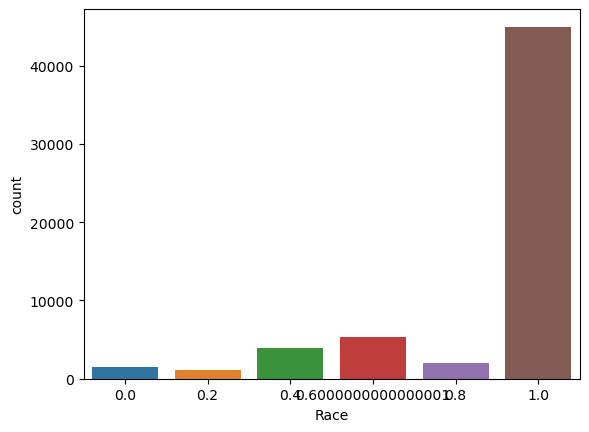

In [28]:
import seaborn as sns
sns.countplot(x='Race', data=data)


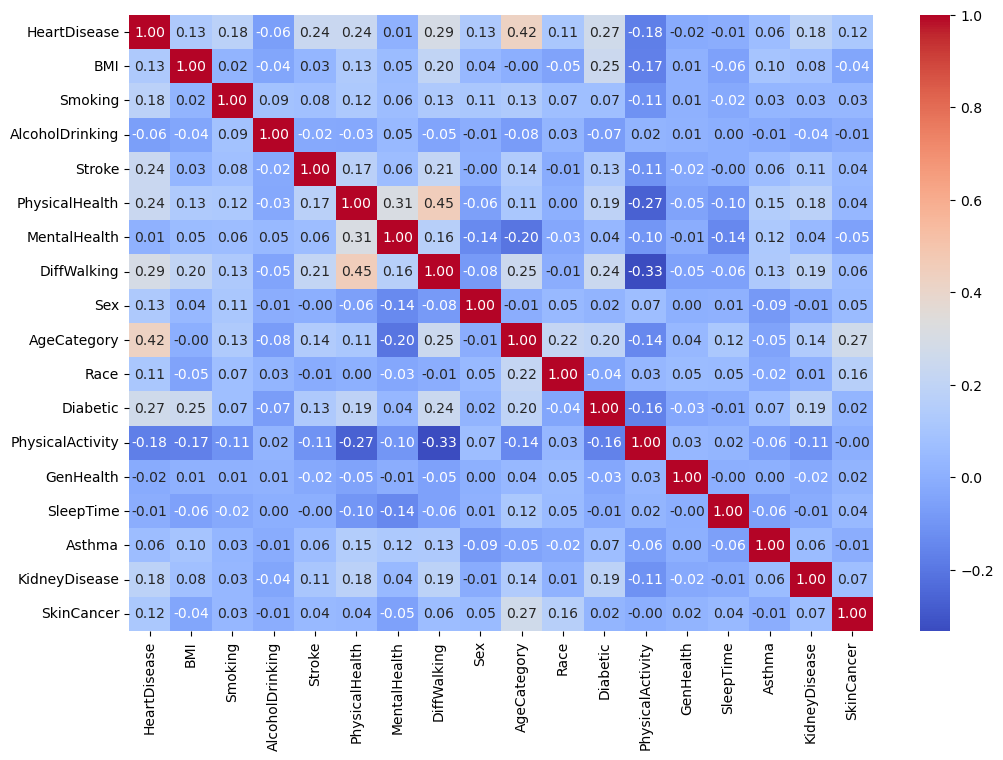

In [29]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [30]:
# Final Check for missing values
print("Missing values after imputation and encoding:")
print(data.isnull().sum())



Missing values after imputation and encoding:
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [31]:
for col in data.select_dtypes(include=[np.number]).columns:
    print(f"Unique values in {col}: {data[col].unique()}")


Unique values in HeartDisease: [0. 1.]
Unique values in BMI: [0.32588761 0.5346814  0.49423936 ... 0.75288032 0.9833059  0.90101105]
Unique values in Smoking: [1. 0.]
Unique values in AlcoholDrinking: [0. 1.]
Unique values in Stroke: [0. 1.]
Unique values in PhysicalHealth: [1.   0.   0.4  0.32 0.16 0.8  0.08 0.24 0.56 0.96 0.64 0.88 0.48 0.72]
Unique values in MentalHealth: [1.  0.  0.2 0.3 0.6 0.5 0.4 0.1 0.7 0.8 0.9]
Unique values in DiffWalking: [0. 1.]
Unique values in Sex: [0. 1.]
Unique values in AgeCategory: [0.5        0.91666667 1.         0.75       0.66666667 0.33333333
 0.         0.08333333 0.83333333 0.41666667 0.58333333 0.25
 0.16666667]
Unique values in Race: [0.6 1.  0.  0.2 0.8 0.4]
Unique values in Diabetic: [0.         0.33333333 0.66666667 1.        ]
Unique values in PhysicalActivity: [1. 0.]
Unique values in GenHealth: [0.5  0.   1.   0.25 0.75]
Unique values in SleepTime: [0.375 0.5   0.625 0.125 0.875 0.75  0.25  1.    0.   ]
Unique values in Asthma: [0. 1.]


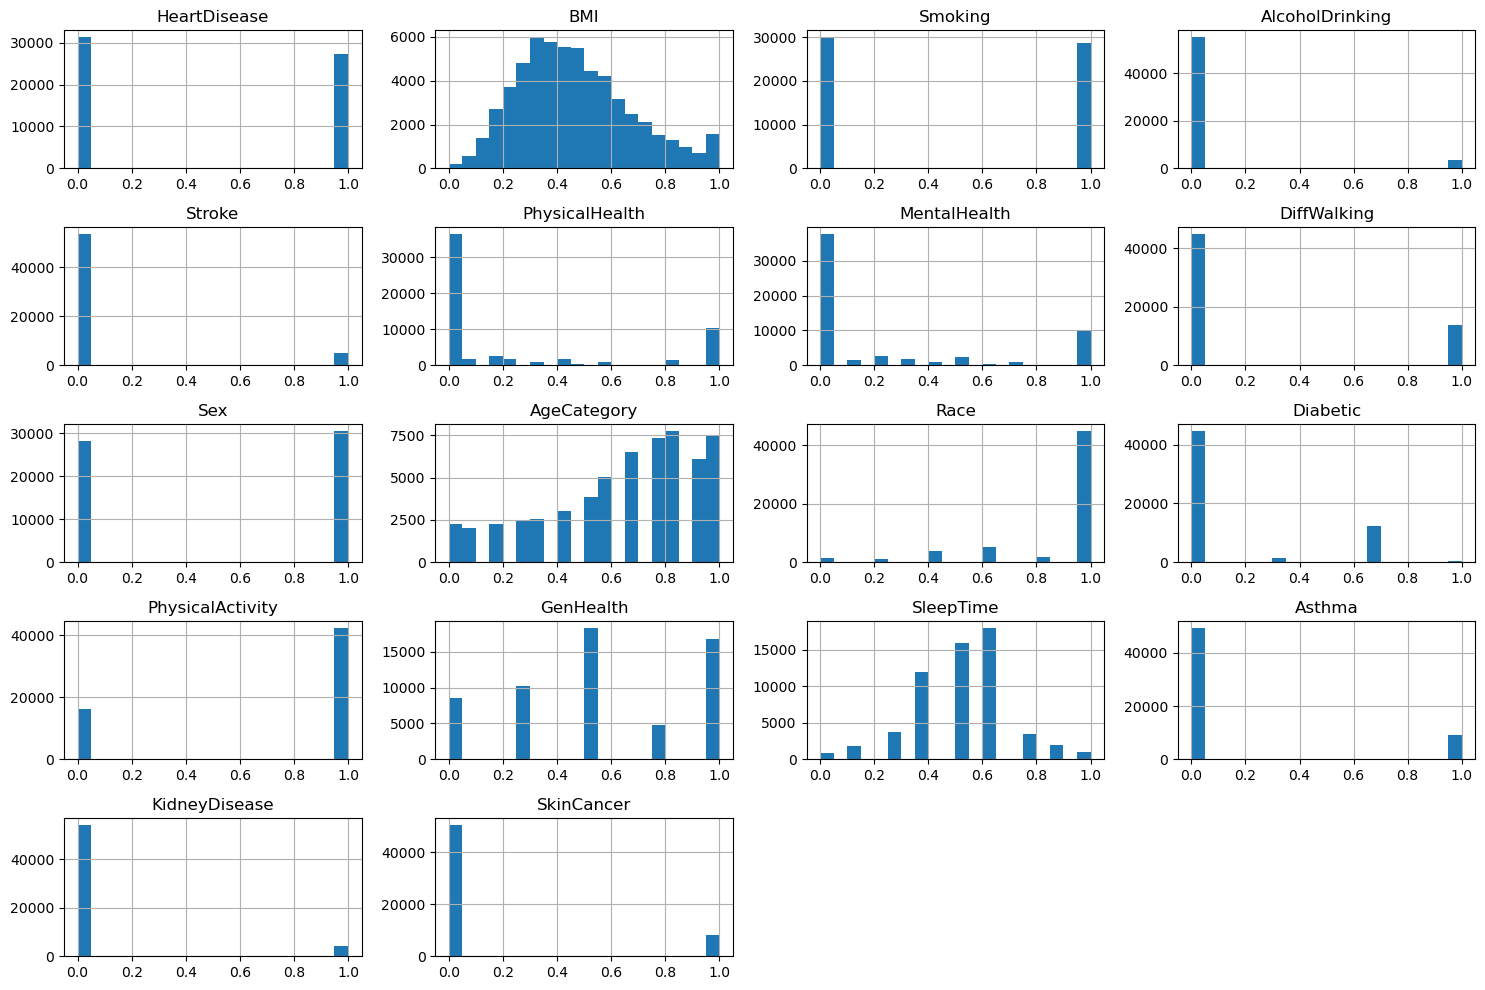

In [32]:
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [33]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,0.325888,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.500000,0.6,0.000000,1.0,0.50,0.375,0.0,0.0,0.0
1,0.0,0.534681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.916667,1.0,0.000000,1.0,0.00,0.500,0.0,0.0,0.0
2,0.0,0.494239,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.000000,1.0,0.00,0.500,1.0,0.0,0.0
3,1.0,0.534681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.000000,1.0,1.00,0.625,0.0,0.0,0.0
4,0.0,0.186692,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.750000,1.0,0.000000,1.0,0.25,0.625,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58682,1.0,0.228545,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.833333,1.0,0.666667,1.0,0.25,0.125,1.0,0.0,1.0
58683,0.0,0.330590,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,1.0,0.000000,1.0,1.00,0.375,0.0,0.0,1.0
58684,1.0,0.172114,0.0,0.0,0.0,0.4,0.4,0.0,0.0,0.750000,1.0,0.000000,1.0,0.50,0.500,0.0,0.0,0.0
58685,0.0,0.373383,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.750000,1.0,0.000000,0.0,0.50,0.500,0.0,0.0,1.0


# Class Balancing

In [34]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

In [35]:
X = data.drop(columns=['HeartDisease'])  
y = data['HeartDisease']  

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Print the class distribution before sampling
print("Before Sampling:")
print("Training Set Class Distribution:", Counter(y_train))
print("Testing Set Class Distribution:", Counter(y_test))

Before Sampling:
Training Set Class Distribution: Counter({0.0: 25168, 1.0: 21781})
Testing Set Class Distribution: Counter({0.0: 6258, 1.0: 5480})


In [37]:
# 1. **Oversampling with SMOTE**
smote = SMOTE(random_state=42)
X_train, y_train= smote.fit_resample(X_train, y_train)
print("\nAfter SMOTE Oversampling:")
print("Training Set Class Distribution:", Counter(y_train))

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



After SMOTE Oversampling:
Training Set Class Distribution: Counter({0.0: 25168, 1.0: 25168})


# LogisticRegression

In [38]:
import time
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Initialize Logistic Regression
model_lr = LogisticRegression(max_iter=1000)

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Start measuring time for cross-validation
start_time = time.time()

# Perform cross-validation and calculate the accuracy
cross_val_accuracy = cross_val_score(model_lr, X_train, y_train, cv=kf, scoring='accuracy')
mean_cv_accuracy = np.mean(cross_val_accuracy)

# End time after cross-validation
end_time = time.time()
time_taken_cv = end_time - start_time

param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # L2 regularization to prevent overfitting
    'solver': ['liblinear'] 
}

grid_search = GridSearchCV(model_lr, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # 'binary' for binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Test Accuracy (on the test set)
test_accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("K-Fold Cross-Validation Accuracy: {:.4f}".format(mean_cv_accuracy))
print("\nBest Logistic Regression Model Performance after Hyperparameter Tuning:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Computational Efficiency (Time): {time_taken_cv:.4f} seconds\n")


Fitting 5 folds for each of 4 candidates, totalling 20 fits
K-Fold Cross-Validation Accuracy: 0.7496

Best Logistic Regression Model Performance after Hyperparameter Tuning:
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.7491
Precision: 0.7163
Recall: 0.7661
F1-Score: 0.7403
Test Accuracy: 0.7491
Computational Efficiency (Time): 0.8443 seconds



# naive_bayes 

In [39]:
import time
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Initialize Naive Bayes model
nb_model = GaussianNB()

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_accuracy = cross_val_score(nb_model, X_train, y_train, cv=kf, scoring='accuracy')
mean_cv_accuracy = np.mean(cross_val_accuracy)

# Perform GridSearchCV for hyperparameter tuning on 'var_smoothing'
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
grid_search = GridSearchCV(nb_model, param_grid, cv=kf, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_nb_model = grid_search.best_estimator_

# Measure the time taken to fit and predict with the best model
start_time = time.time()

# Fit the best model
best_nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = best_nb_model.predict(X_test)

# Calculate performance metrics for test data
test_accuracy = accuracy_score(y_test, y_pred_nb)

# Calculate performance metrics for training data
y_train_pred = best_nb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Measure computational efficiency (time taken)
nb_time = time.time() - start_time

# Print the results
print("Naive Bayes (GaussianNB) with Cross-Validation and Hyperparameter Tuning")
print(f"K-Fold Cross-Validation Accuracy: {mean_cv_accuracy:.4f}")
print("\nBest Model Performance after Hyperparameter Tuning:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1-Score: {train_f1:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Computational Efficiency (Time): {nb_time:.4f} seconds")


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Naive Bayes (GaussianNB) with Cross-Validation and Hyperparameter Tuning
K-Fold Cross-Validation Accuracy: 0.7089

Best Model Performance after Hyperparameter Tuning:
Best Parameters: {'var_smoothing': 1e-09}
Training Accuracy: 0.7093
Training Precision: 0.7633
Training Recall: 0.6068
Training F1-Score: 0.6761
Test Accuracy: 0.7197
Computational Efficiency (Time): 0.2155 seconds


# svm import SVC

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Initialize and train the SVM model
start_time = time.time()
model_svm = SVC(kernel='linear')  # You can use other kernels like 'rbf' as well
model_svm.fit(X_train, y_train)
end_time = time.time()

# Make predictions
y_pred_svm = model_svm.predict(X_test)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='binary')
recall_svm = recall_score(y_test, y_pred_svm, average='binary')
f1_svm = f1_score(y_test, y_pred_svm, average='binary')

# Training metrics
y_train_pred_svm = model_svm.predict(X_train)
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
train_precision_svm = precision_score(y_train, y_train_pred_svm, average='binary')
train_recall_svm = recall_score(y_train, y_train_pred_svm, average='binary')
train_f1_svm = f1_score(y_train, y_train_pred_svm, average='binary')

# Computational Efficiency
time_taken_svm = end_time - start_time

# Print the results
print("Support Vector Machine (SVM)")
print(f"Training Accuracy: {train_accuracy_svm:.4f}")
print(f"Training Precision: {train_precision_svm:.4f}")
print(f"Training Recall: {train_recall_svm:.4f}")
print(f"Training F1-Score: {train_f1_svm:.4f}")
print(f"Test Accuracy: {accuracy_svm:.4f}")
print(f"Computational Efficiency (Time): {time_taken_svm:.4f} seconds")


Support Vector Machine (SVM)
Training Accuracy: 0.7502
Training Precision: 0.7349
Training Recall: 0.7827
Training F1-Score: 0.7581
Test Accuracy: 0.7487
Computational Efficiency (Time): 213.9255 seconds


In [41]:
# import time
# from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# # Initialize SVM model
# model_svm = SVC(kernel='linear')

# # Perform K-Fold Cross-Validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# cross_val_accuracy_svm = cross_val_score(model_svm, X_train, y_train, cv=kf, scoring='accuracy')
# mean_cv_accuracy_svm = np.mean(cross_val_accuracy_svm)

# # Optimized Hyperparameter Tuning using GridSearchCV
# # Reducing the search space and enabling parallel computation
# param_grid = {
#     'C': [0.1, 1, 10],  # Reduced range of values
#     'kernel': ['linear', 'rbf'],  # Kernels to test
#     'gamma': ['scale', 'auto']  # Kernel coefficient
# }

# grid_search_svm = GridSearchCV(SVC(), param_grid, cv=kf, scoring='accuracy', verbose=1, n_jobs=-1)
# grid_search_svm.fit(X_train, y_train)

# # Get the best model from GridSearchCV
# best_svm_model = grid_search_svm.best_estimator_

# # Measure the time taken to fit and predict with the best model
# start_time = time.time()

# # Fit the best model
# best_svm_model.fit(X_train, y_train)

# # Predict
# y_pred_svm = best_svm_model.predict(X_test)

# # Calculate performance metrics
# svm_accuracy = accuracy_score(y_test, y_pred_svm)
# svm_precision = precision_score(y_test, y_pred_svm)
# svm_recall = recall_score(y_test, y_pred_svm)
# svm_f1 = f1_score(y_test, y_pred_svm)

# # Training metrics
# y_train_pred_svm = best_svm_model.predict(X_train)
# train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
# train_precision_svm = precision_score(y_train, y_train_pred_svm)
# train_recall_svm = recall_score(y_train, y_train_pred_svm)
# train_f1_svm = f1_score(y_train, y_train_pred_svm)

# # Measure computational efficiency (time taken)
# svm_time = time.time() - start_time

# # Print the results
# print("SVM (Support Vector Machine) with Optimizations")
# print(f"K-Fold Cross-Validation Accuracy: {mean_cv_accuracy_svm:.4f}")
# print("\nBest Model Performance after Hyperparameter Tuning:")
# print(f"Best Parameters: {grid_search_svm.best_params_}")
# print(f"Training Accuracy: {train_accuracy_svm:.4f}")
# print(f"Training Precision: {train_precision_svm:.4f}")
# print(f"Training Recall: {train_recall_svm:.4f}")
# print(f"Training F1-Score: {train_f1_svm:.4f}")
# print(f"Test Accuracy: {svm_accuracy:.4f}")
# print(f"Computational Efficiency (Time): {svm_time:.4f} seconds")


In [ ]:
# import time
# from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# # Initialize SVM model with a linear kernel for faster computation
# model_svm = SVC(kernel='linear')

# # Perform K-Fold Cross-Validation (reduce number of folds to speed up)
# kf = KFold(n_splits=3, shuffle=True, random_state=42)  # Reduced from 5 to 3 folds
# cross_val_accuracy_svm = cross_val_score(model_svm, X_train, y_train, cv=kf, scoring='accuracy')
# mean_cv_accuracy_svm = np.mean(cross_val_accuracy_svm)

# # Optimized Hyperparameter Tuning using RandomizedSearchCV (reducing the search space)
# param_dist = {
#     'C': [0.1, 1, 10],  # Reduced range of values
#     'kernel': ['linear'],  # Only the linear kernel for faster computation
#     'gamma': ['scale']  # Keeping gamma fixed
# }

# # Use RandomizedSearchCV for faster hyperparameter search (n_iter limits the number of combinations)
# random_search_svm = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=10, cv=kf, scoring='accuracy', n_jobs=-1, verbose=1)
# random_search_svm.fit(X_train, y_train)

# # Get the best model from RandomizedSearchCV
# best_svm_model = random_search_svm.best_estimator_

# # Measure the time taken to fit and predict with the best model
# start_time = time.time()

# # Scale the data (important for SVM to perform better)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Fit the best model
# best_svm_model.fit(X_train_scaled, y_train)

# # Predict
# y_pred_svm = best_svm_model.predict(X_test_scaled)

# # Calculate performance metrics
# svm_accuracy = accuracy_score(y_test, y_pred_svm)
# svm_precision = precision_score(y_test, y_pred_svm)
# svm_recall = recall_score(y_test, y_pred_svm)
# svm_f1 = f1_score(y_test, y_pred_svm)

# # Training metrics (on the training set)
# y_train_pred_svm = best_svm_model.predict(X_train_scaled)
# train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
# train_precision_svm = precision_score(y_train, y_train_pred_svm)
# train_recall_svm = recall_score(y_train, y_train_pred_svm)
# train_f1_svm = f1_score(y_train, y_train_pred_svm)

# # Measure computational efficiency (time taken)
# svm_time = time.time() - start_time

# # Print the results
# print("SVM (Support Vector Machine) with Optimizations")
# print(f"K-Fold Cross-Validation Accuracy: {mean_cv_accuracy_svm:.4f}")
# print("\nBest Model Performance after Hyperparameter Tuning:")
# print(f"Best Parameters: {random_search_svm.best_params_}")
# print(f"Training Accuracy: {train_accuracy_svm:.4f}")
# print(f"Training Precision: {train_precision_svm:.4f}")
# print(f"Training Recall: {train_recall_svm:.4f}")
# print(f"Training F1-Score: {train_f1_svm:.4f}")
# print(f"Test Accuracy: {svm_accuracy:.4f}")
# print(f"Computational Efficiency (Time): {svm_time:.4f} seconds")


# KNeighborsClassifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score
import time

# Define the range of k values for tuning
k_range = range(1, 21)

# Perform hyperparameter tuning using GridSearchCV for k (number of neighbors)
param_grid = {
    'n_neighbors': k_range,  # Try different values for k
}

# Initialize KNN model
model_knn = KNeighborsClassifier()

# Initialize GridSearchCV to find the optimal number of neighbors
grid_search = GridSearchCV(estimator=model_knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Start the grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Best model from GridSearchCV
best_model_knn = grid_search.best_estimator_

# Make predictions with the best model
y_pred_train = best_model_knn.predict(X_train)
y_pred_test = best_model_knn.predict(X_test)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='binary')
recall = recall_score(y_test, y_pred_test, average='binary')
f1 = f1_score(y_test, y_pred_test, average='binary')

# Cross-validation score
cv_scores = cross_val_score(best_model_knn, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = cv_scores.mean()

# Computational Efficiency
time_taken_knn = end_time - start_time

# Print the results
print("K-Nearest Neighbors (KNN) with Hyperparameter Tuning")
print(f"Best Parameters (k): {grid_search.best_params_}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Cross-Validation Accuracy: {mean_cv_accuracy:.4f}")
print(f"Computational Efficiency (Time): {time_taken_knn:.4f} seconds\n")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
K-Nearest Neighbors (KNN) with Hyperparameter Tuning
Best Parameters (k): {'n_neighbors': 17}
Training Accuracy: 0.7733
Test Accuracy: 0.7461
Precision: 0.7005
Recall: 0.7969
F1-Score: 0.7456
Cross-Validation Accuracy: 0.7463
Computational Efficiency (Time): 217.7349 seconds



# xgboost

In [43]:
# import xgboost as xgb

# # Initialize and train the XGBoost model
# start_time = time.time()
# model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# model_xgb.fit(X_train, y_train)
# end_time = time.time()

# # Make predictions
# y_pred_xgb = model_xgb.predict(X_test)

# # Calculate metrics
# accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
# precision_xgb = precision_score(y_test, y_pred_xgb, average='binary')
# recall_xgb = recall_score(y_test, y_pred_xgb, average='binary')
# f1_xgb = f1_score(y_test, y_pred_xgb, average='binary')

# # Computational Efficiency
# time_taken_xgb = end_time - start_time

# # Print the results
# print("XGBoost")
# print(f"Accuracy: {accuracy_xgb:.4f}")
# print(f"Precision: {precision_xgb:.4f}")
# print(f"Recall: {recall_xgb:.4f}")
# print(f"F1-Score: {f1_xgb:.4f}")
# print(f"Computational Efficiency (Time): {time_taken_xgb:.4f} seconds\n")


C:\Users\PC\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:44:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost
Accuracy: 0.7634
Precision: 0.7295
Recall: 0.7839
F1-Score: 0.7557
Computational Efficiency (Time): 1.0566 seconds



# GradientBoostingClassifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Initialize the model with tuned hyperparameters to prevent overfitting and underfitting
gb_model = GradientBoostingClassifier(
    n_estimators=100,        # Number of boosting stages
    learning_rate=0.05,      # Reduces the contribution of each tree (avoid overfitting)
    max_depth=3,             # Maximum depth of individual trees (avoid overfitting)
    min_samples_split=2,     # Minimum samples required to split an internal node
    min_samples_leaf=1,      # Minimum samples required to be at a leaf node
    subsample=0.8,           # Fraction of samples to fit each tree (use smaller to reduce overfitting)
    random_state=42
)

# Measure the time taken to fit and predict
start_time = time.time()

# Fit the model
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Calculate the performance metrics
gb_accuracy = accuracy_score(y_train, gb_model.predict(X_train))  # Training accuracy
test_accuracy = accuracy_score(y_test, y_pred_gb)  # Test accuracy
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)

# Measure computational efficiency (time taken)
gb_time = time.time() - start_time

# Print the results
print("Gradient Boosting Classifier")
print(f"Training Accuracy: {gb_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {gb_precision:.4f}")
print(f"Recall: {gb_recall:.4f}")
print(f"F1-Score: {gb_f1:.4f}")
print(f"Computational Efficiency (Time): {gb_time:.4f} seconds")


Gradient Boosting Classifier
Training Accuracy: 0.7686
Test Accuracy: 0.7605
Precision: 0.7167
Recall: 0.8055
F1-Score: 0.7585
Computational Efficiency (Time): 11.6902 seconds


# AdaBoostClassifier

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Initialize the model with tuned hyperparameters to handle overfitting and underfitting
ada_model = AdaBoostClassifier(
    n_estimators=100,        # Number of boosting stages
    learning_rate=0.1,       # Controls the contribution of each learner (reduce overfitting)
    algorithm='SAMME',        
    random_state=42
)

# Measure the time taken to fit and predict
start_time = time.time()

# Fit the model
ada_model.fit(X_train, y_train)

# Predict
y_pred_ada = ada_model.predict(X_test)

# Calculate the performance metrics
train_accuracy = accuracy_score(y_train, ada_model.predict(X_train))  # Training accuracy
test_accuracy = accuracy_score(y_test, y_pred_ada)  # Test accuracy
ada_precision = precision_score(y_test, y_pred_ada)
ada_recall = recall_score(y_test, y_pred_ada)
ada_f1 = f1_score(y_test, y_pred_ada)

# Measure computational efficiency (time taken)
ada_time = time.time() - start_time

# Print the results
print("AdaBoost Classifier")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {ada_precision:.4f}")
print(f"Recall: {ada_recall:.4f}")
print(f"F1-Score: {ada_f1:.4f}")
print(f"Computational Efficiency (Time): {ada_time:.4f} seconds")


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoost Classifier
Training Accuracy: 0.7469
Test Accuracy: 0.7415
Precision: 0.6802
Recall: 0.8423
F1-Score: 0.7526
Computational Efficiency (Time): 8.6656 seconds


# RandomForestClassifier

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [5, 10, 20],               # Max depth of trees
    'min_samples_split': [2, 10, 20],       # Min samples required to split
    'max_features': ['sqrt', 'auto']       # Number of features to consider
}

# Initialize RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Use the best model to make predictions
best_model_rf = grid_search.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

# Calculate and print metrics
train_accuracy_rf = accuracy_score(y_train, best_model_rf.predict(X_train))  # Training accuracy
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)  # Test accuracy
precision_rf = precision_score(y_test, y_pred_rf, average='binary')
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')

print("Random Forest (Optimized)")
print(f"Training Accuracy: {train_accuracy_rf:.4f}")
print(f"Test Accuracy: {test_accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
81 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\utils\

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 20, 'n_estimators': 200}
Best Accuracy: 0.7646416508318626
Random Forest (Optimized)
Training Accuracy: 0.8315
Test Accuracy: 0.7626
Precision: 0.7194
Recall: 0.8057
F1-Score: 0.7601


# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# With unrelevant features

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Drop unrelevant features 

In [48]:
relevant_features = ["HeartDisease", "BMI", "Smoking", "AlcoholDrinking", 
                     "Stroke", "PhysicalHealth", "DiffWalking", "Sex", 
                     "AgeCategory", "Diabetic", "PhysicalActivity", "GenHealth"]

data = data[relevant_features]
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth
0,0.0,0.325888,1.0,0.0,0.0,1.0,0.0,0.0,0.500000,0.000000,1.0,0.50
1,0.0,0.534681,0.0,0.0,0.0,0.0,0.0,0.0,0.916667,0.000000,1.0,0.00
2,0.0,0.494239,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.00
3,1.0,0.534681,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.00
4,0.0,0.186692,1.0,0.0,1.0,0.0,0.0,1.0,0.750000,0.000000,1.0,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...
58682,1.0,0.228545,1.0,0.0,0.0,1.0,0.0,0.0,0.833333,0.666667,1.0,0.25
58683,0.0,0.330590,1.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.000000,1.0,1.00
58684,1.0,0.172114,0.0,0.0,0.0,0.4,0.0,0.0,0.750000,0.000000,1.0,0.50
58685,0.0,0.373383,1.0,0.0,0.0,1.0,1.0,1.0,0.750000,0.000000,0.0,0.50


# Visualize the distribution of numerical features 

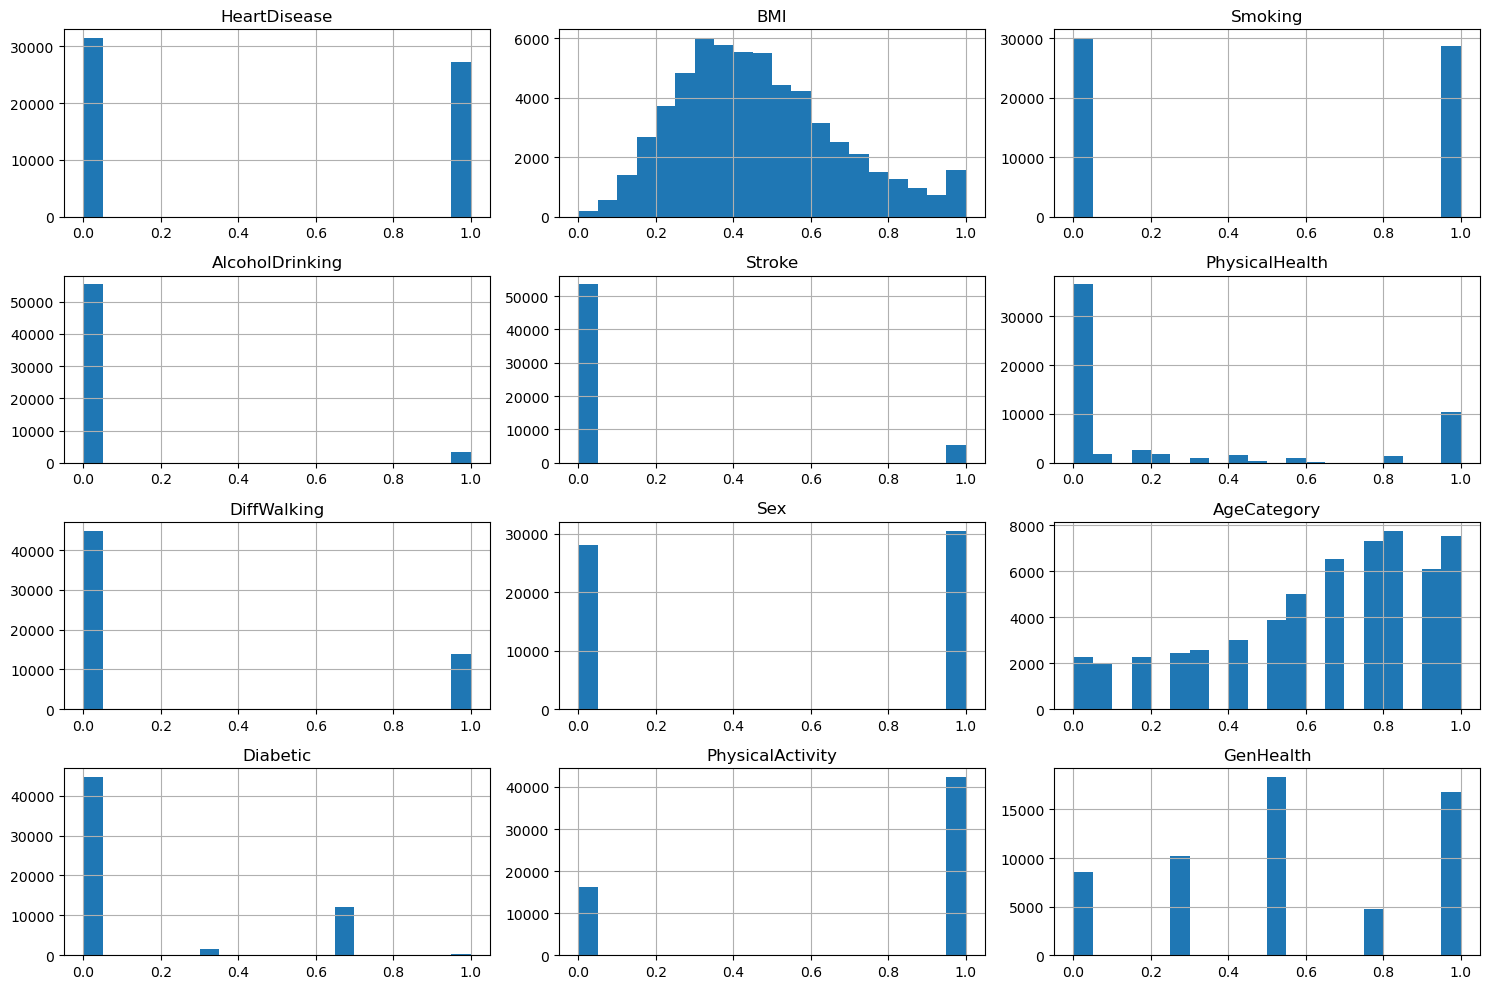

In [49]:
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

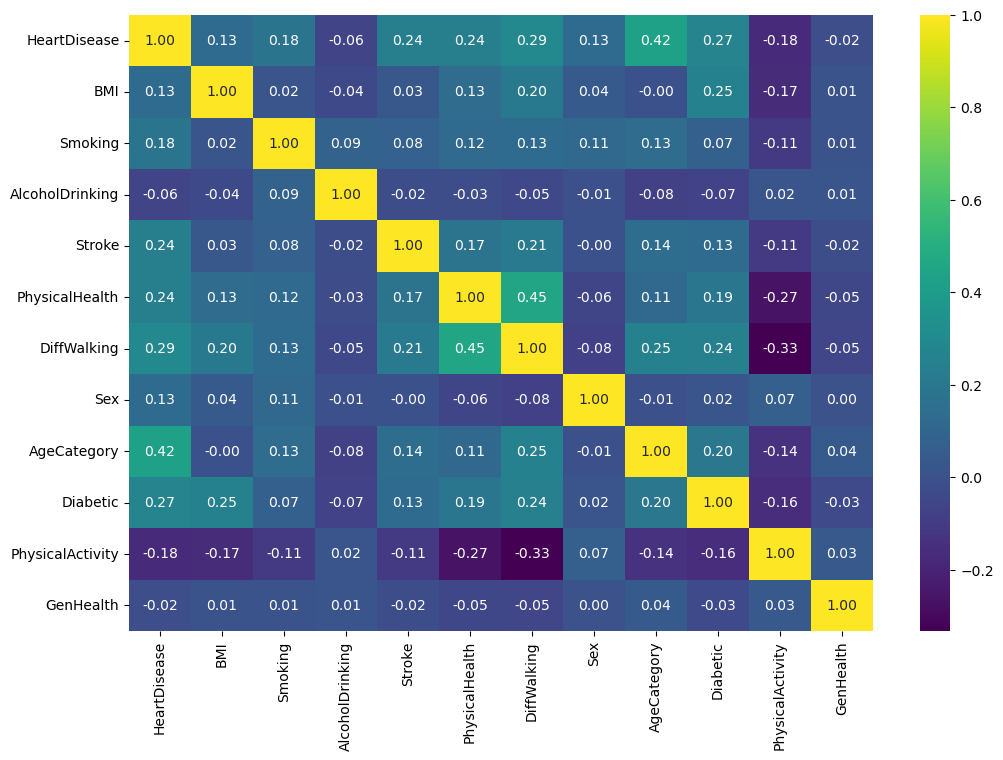

In [50]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.show()


# Check for Missing Values

In [51]:
print(data.isnull().sum())

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
DiffWalking         0
Sex                 0
AgeCategory         0
Diabetic            0
PhysicalActivity    0
GenHealth           0
dtype: int64


# Splitting Data into Training and Test Sets

In [52]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your dataframe and 'HeartDisease' is your target
X = data.drop(columns=['HeartDisease'])  # Features
Y = data['HeartDisease']  # Target

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [53]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Before Sampling:")
print("Training Set Class Distribution:", Counter(y_train))
print("Testing Set Class Distribution:", Counter(y_test))

# **Oversampling with SMOTE**
smote = SMOTE(random_state=42)
X_train, y_train= smote.fit_resample(X_train, y_train)
print("\nAfter SMOTE Oversampling:")
print("Training Set Class Distribution:", Counter(y_train))

Before Sampling:
Training Set Class Distribution: Counter({0.0: 25168, 1.0: 21781})
Testing Set Class Distribution: Counter({0.0: 6258, 1.0: 5480})


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



After SMOTE Oversampling:
Training Set Class Distribution: Counter({0.0: 25168, 1.0: 25168})


# LogisticRegression

In [54]:
import time
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Initialize Logistic Regression
model_lr = LogisticRegression(max_iter=1000)

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Start measuring time for cross-validation
start_time = time.time()

# Perform cross-validation and calculate the accuracy
cross_val_accuracy = cross_val_score(model_lr, X_train, y_train, cv=kf, scoring='accuracy')
mean_cv_accuracy = np.mean(cross_val_accuracy)

# End time after cross-validation
end_time = time.time()
time_taken_cv = end_time - start_time

# Now, apply GridSearchCV for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # L2 regularization to prevent overfitting
    'solver': ['liblinear']  # Solver suitable for smaller datasets
}

grid_search = GridSearchCV(model_lr, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # 'binary' for binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Test Accuracy (on the test set)
test_accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("K-Fold Cross-Validation Accuracy: {:.4f}".format(mean_cv_accuracy))
print("\nBest Logistic Regression Model Performance after Hyperparameter Tuning:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Computational Efficiency (Time): {time_taken_cv:.4f} seconds\n")


Fitting 5 folds for each of 4 candidates, totalling 20 fits
K-Fold Cross-Validation Accuracy: 0.7454

Best Logistic Regression Model Performance after Hyperparameter Tuning:
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.7446
Precision: 0.7109
Recall: 0.7633
F1-Score: 0.7362
Test Accuracy: 0.7446
Computational Efficiency (Time): 0.6631 seconds



# RandomForestClassifier

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [5, 10, 20],               # Max depth of trees
    'min_samples_split': [2, 10, 20],       # Min samples required to split
    'max_features': ['sqrt', 'auto']       # Number of features to consider
}

# Initialize RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Use the best model to make predictions
best_model_rf = grid_search.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

# Calculate and print metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='binary')
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')

# Add Test Accuracy
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest (Optimized)")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"Test Accuracy: {test_accuracy_rf:.4f}")  # Added Test Accuracy


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
81 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\utils\

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 20, 'n_estimators': 50}
Best Accuracy: 0.7604895584520849
Random Forest (Optimized)
Accuracy: 0.7586
Precision: 0.7100
Recall: 0.8164
F1-Score: 0.7595
Test Accuracy: 0.7586


# Support Vector Machine

In [56]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Initialize and train the SVM model
start_time = time.time()
model_svm = SVC(kernel='linear')  # You can use other kernels like 'rbf' as well
model_svm.fit(X_train, y_train)
end_time = time.time()

# Make predictions
y_pred_svm = model_svm.predict(X_test)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='binary')
recall_svm = recall_score(y_test, y_pred_svm, average='binary')
f1_svm = f1_score(y_test, y_pred_svm, average='binary')

# Training metrics
y_train_pred_svm = model_svm.predict(X_train)
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
train_precision_svm = precision_score(y_train, y_train_pred_svm, average='binary')
train_recall_svm = recall_score(y_train, y_train_pred_svm, average='binary')
train_f1_svm = f1_score(y_train, y_train_pred_svm, average='binary')

# Computational Efficiency
time_taken_svm = end_time - start_time

# Print the results
print("Support Vector Machine (SVM)")
print(f"Training Accuracy: {train_accuracy_svm:.4f}")
print(f"Training Precision: {train_precision_svm:.4f}")
print(f"Training Recall: {train_recall_svm:.4f}")
print(f"Training F1-Score: {train_f1_svm:.4f}")
print(f"Test Accuracy: {accuracy_svm:.4f}")
print(f"Computational Efficiency (Time): {time_taken_svm:.4f} seconds")


Support Vector Machine (SVM)
Training Accuracy: 0.7463
Training Precision: 0.7312
Training Recall: 0.7789
Training F1-Score: 0.7543
Test Accuracy: 0.7443
Computational Efficiency (Time): 194.3351 seconds


In [57]:
# import time
# from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# # Assuming 'data' is your dataframe and 'HeartDisease' is your target
# X = data.drop(columns=['HeartDisease'])  # Features
# Y = data['HeartDisease']  # Target

# # Scale features to improve SVM performance
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# # Split the data into training (80%) and testing (20%) sets
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# # Initialize SVM model
# model_svm = SVC(kernel='linear')

# # Perform K-Fold Cross-Validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# cross_val_accuracy_svm = cross_val_score(model_svm, X_train, y_train, cv=kf, scoring='accuracy')
# mean_cv_accuracy_svm = np.mean(cross_val_accuracy_svm)

# # Optimized Hyperparameter Tuning using GridSearchCV
# # Reducing the search space and enabling parallel computation
# param_grid = {
#     'C': [0.1, 1, 10],  # Reduced range of values
#     'kernel': ['linear', 'rbf'],  # Kernels to test
#     'gamma': ['scale', 'auto']  # Kernel coefficient
# }

# grid_search_svm = GridSearchCV(SVC(), param_grid, cv=kf, scoring='accuracy', verbose=1, n_jobs=-1)
# grid_search_svm.fit(X_train, y_train)

# # Get the best model from GridSearchCV
# best_svm_model = grid_search_svm.best_estimator_

# # Measure the time taken to fit and predict with the best model
# start_time = time.time()

# # Fit the best model
# best_svm_model.fit(X_train, y_train)

# # Predict
# y_pred_svm = best_svm_model.predict(X_test)

# # Calculate performance metrics
# svm_accuracy = accuracy_score(y_test, y_pred_svm)
# svm_precision = precision_score(y_test, y_pred_svm)
# svm_recall = recall_score(y_test, y_pred_svm)
# svm_f1 = f1_score(y_test, y_pred_svm)

# # Training metrics
# y_train_pred_svm = best_svm_model.predict(X_train)
# train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
# train_precision_svm = precision_score(y_train, y_train_pred_svm)
# train_recall_svm = recall_score(y_train, y_train_pred_svm)
# train_f1_svm = f1_score(y_train, y_train_pred_svm)

# # Measure computational efficiency (time taken)
# svm_time = time.time() - start_time

# # Print the results
# print("SVM (Support Vector Machine) with Optimizations")
# print(f"K-Fold Cross-Validation Accuracy: {mean_cv_accuracy_svm:.4f}")
# print("\nBest Model Performance after Hyperparameter Tuning:")
# print(f"Best Parameters: {grid_search_svm.best_params_}")
# print(f"Training Accuracy: {train_accuracy_svm:.4f}")
# print(f"Training Precision: {train_precision_svm:.4f}")
# print(f"Training Recall: {train_recall_svm:.4f}")
# print(f"Training F1-Score: {train_f1_svm:.4f}")
# print(f"Test Accuracy: {svm_accuracy:.4f}")
# print(f"Computational Efficiency (Time): {svm_time:.4f} seconds")


# KNeighborsClassifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score
import time
import matplotlib.pyplot as plt

# Define the range of k values for tuning
k_range = range(1, 21)

# Initialize lists to store training and test accuracies for different values of k
train_accuracies = []
test_accuracies = []

# Perform hyperparameter tuning using GridSearchCV for k (number of neighbors)
param_grid = {
    'n_neighbors': k_range,  # Try different values for k
}

# Initialize KNN model
model_knn = KNeighborsClassifier()

# Initialize GridSearchCV to find the optimal number of neighbors
grid_search = GridSearchCV(estimator=model_knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Start the grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Best model from GridSearchCV
best_model_knn = grid_search.best_estimator_

# Make predictions with the best model
y_pred_train = best_model_knn.predict(X_train)
y_pred_test = best_model_knn.predict(X_test)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='binary')
recall = recall_score(y_test, y_pred_test, average='binary')
f1 = f1_score(y_test, y_pred_test, average='binary')

# Cross-validation score
cv_scores = cross_val_score(best_model_knn, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = cv_scores.mean()

# Computational Efficiency
time_taken_knn = end_time - start_time

# Print the results
print("K-Nearest Neighbors (KNN) with Hyperparameter Tuning")
print(f"Best Parameters (k): {grid_search.best_params_}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Cross-Validation Accuracy: {mean_cv_accuracy:.4f}")
print(f"Computational Efficiency (Time): {time_taken_knn:.4f} seconds\n")




Fitting 5 folds for each of 20 candidates, totalling 100 fits
K-Nearest Neighbors (KNN) with Hyperparameter Tuning
Best Parameters (k): {'n_neighbors': 17}
Training Accuracy: 0.7753
Test Accuracy: 0.7404
Precision: 0.6935
Recall: 0.7956
F1-Score: 0.7411
Cross-Validation Accuracy: 0.7501
Computational Efficiency (Time): 297.8090 seconds



# xgb

In [59]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Initialize and train the XGBoost model
start_time = time.time()
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)
end_time = time.time()

# Make predictions
y_pred_xgb = model_xgb.predict(X_test)

# Calculate metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='binary')
recall_xgb = recall_score(y_test, y_pred_xgb, average='binary')
f1_xgb = f1_score(y_test, y_pred_xgb, average='binary')

# Add Test Accuracy
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Computational Efficiency
time_taken_xgb = end_time - start_time

# Print the results
print("XGBoost")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(f"Computational Efficiency (Time): {time_taken_xgb:.4f} seconds")
print(f"Test Accuracy: {test_accuracy_xgb:.4f}")  # Added Test Accuracy


C:\Users\PC\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:20:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost
Accuracy: 0.7557
Precision: 0.7134
Recall: 0.7967
F1-Score: 0.7528
Computational Efficiency (Time): 0.7551 seconds
Test Accuracy: 0.7557


# Gradient Boosting Classifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Initialize the model with tuned hyperparameters to prevent overfitting and underfitting
gb_model = GradientBoostingClassifier(
    n_estimators=100,        # Number of boosting stages
    learning_rate=0.05,      # Reduces the contribution of each tree (avoid overfitting)
    max_depth=3,             # Maximum depth of individual trees (avoid overfitting)
    min_samples_split=2,     # Minimum samples required to split an internal node
    min_samples_leaf=1,      # Minimum samples required to be at a leaf node
    subsample=0.8,           # Fraction of samples to fit each tree (use smaller to reduce overfitting)
    random_state=42
)

# Measure the time taken to fit and predict
start_time = time.time()

# Fit the model
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Calculate the performance metrics
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)

# Add Test Accuracy
test_accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Measure computational efficiency (time taken)
gb_time = time.time() - start_time

# Print the results
print("Gradient Boosting Classifier")
print("Accuracy: ", gb_accuracy)
print("Precision: ", gb_precision)
print("Recall: ", gb_recall)
print("F1-score: ", gb_f1)
print("Computational Efficiency (Time): ", gb_time, "seconds")
print(f"Test Accuracy: {test_accuracy_gb:.4f}")  # Added Test Accuracy


Gradient Boosting Classifier
Accuracy:  0.7583063554268189
Precision:  0.7110011176752355
Recall:  0.8125912408759124
F1-score:  0.7584092650940986
Computational Efficiency (Time):  9.043480157852173 seconds
Test Accuracy: 0.7583


# AdaBoost Classifier

In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Initialize the model with tuned hyperparameters to handle overfitting and underfitting
ada_model = AdaBoostClassifier(
    n_estimators=100,        # Number of boosting stages
    learning_rate=0.1,       # Controls the contribution of each learner (reduce overfitting)
    algorithm='SAMME',        # Faster version of SAMME algorithm
    random_state=42
)

# Measure the time taken to fit and predict
start_time = time.time()

# Fit the model
ada_model.fit(X_train, y_train)

# Predict
y_pred_ada = ada_model.predict(X_test)

# Calculate the performance metrics
ada_accuracy = accuracy_score(y_test, y_pred_ada)
ada_precision = precision_score(y_test, y_pred_ada)
ada_recall = recall_score(y_test, y_pred_ada)
ada_f1 = f1_score(y_test, y_pred_ada)

# Add Test Accuracy
test_accuracy_ada = accuracy_score(y_test, y_pred_ada)

# Measure computational efficiency (time taken)
ada_time = time.time() - start_time

# Print the results
print("AdaBoost Classifier")
print("Accuracy: ", ada_accuracy)
print("Precision: ", ada_precision)
print("Recall: ", ada_recall)
print("F1-score: ", ada_f1)
print("Computational Efficiency (Time): ", ada_time, "seconds")
print(f"Test Accuracy: {test_accuracy_ada:.4f}")  # Added Test Accuracy


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoost Classifier
Accuracy:  0.7412676776282161
Precision:  0.6781911013858497
Recall:  0.8483576642335766
F1-score:  0.753790028374544
Computational Efficiency (Time):  6.205371379852295 seconds
Test Accuracy: 0.7413


# Naive Bayes (GaussianNB)

In [62]:
import time
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Assuming 'data' is your dataframe and 'HeartDisease' is your target
X = data.drop(columns=['HeartDisease'])  # Features
Y = data['HeartDisease']  # Target

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Naive Bayes model
nb_model = GaussianNB()

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_accuracy = cross_val_score(nb_model, X_train, y_train, cv=kf, scoring='accuracy')
mean_cv_accuracy = np.mean(cross_val_accuracy)

# Perform GridSearchCV for hyperparameter tuning on 'var_smoothing'
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
grid_search = GridSearchCV(nb_model, param_grid, cv=kf, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_nb_model = grid_search.best_estimator_

# Measure the time taken to fit and predict with the best model
start_time = time.time()

# Fit the best model
best_nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = best_nb_model.predict(X_test)

# Calculate performance metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)

# Add Test Accuracy
test_accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Measure computational efficiency (time taken)
nb_time = time.time() - start_time

# Print the results
print("Naive Bayes (GaussianNB) with Cross-Validation and Hyperparameter Tuning")
print(f"K-Fold Cross-Validation Accuracy: {mean_cv_accuracy:.4f}")
print("\nBest Model Performance after Hyperparameter Tuning:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"F1-Score: {nb_f1:.4f}")
print(f"Computational Efficiency (Time): {nb_time:.4f} seconds")
print(f"Test Accuracy: {test_accuracy_nb:.4f}")  # Added Test Accuracy


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Naive Bayes (GaussianNB) with Cross-Validation and Hyperparameter Tuning
K-Fold Cross-Validation Accuracy: 0.7138

Best Model Performance after Hyperparameter Tuning:
Best Parameters: {'var_smoothing': 1e-09}
Accuracy: 0.7163
Precision: 0.7331
Recall: 0.6170
F1-Score: 0.6700
Computational Efficiency (Time): 0.0995 seconds
Test Accuracy: 0.7163


# ANN

In [63]:
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split your data (X and y) into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and define the ANN model
model_ann = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Hidden layer 1
    Dense(32, activation='relu'),                             # Hidden layer 2
    Dense(1, activation='sigmoid')                            # Output layer (binary classification)
])

# Compile the ANN model
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN model and measure the time taken
start_time = time.time()
history = model_ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
end_time = time.time()

# Make predictions
y_train_pred = (model_ann.predict(X_train) > 0.5).astype(int)  # Predictions on the training set
y_test_pred = (model_ann.predict(X_test) > 0.5).astype(int)    # Predictions on the test set

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='binary')
recall = recall_score(y_test, y_test_pred, average='binary')
f1 = f1_score(y_test, y_test_pred, average='binary')

# Computational Efficiency
time_taken = end_time - start_time

# Print the results
print("Artificial Neural Network (ANN)")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Computational Efficiency (Time): {time_taken:.4f} seconds\n")

# Test Accuracy (on the test set)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


C:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1468/1468 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Artificial Neural Network (ANN)
Accuracy: 0.7551
Precision: 0.7109
Recall: 0.8011
F1-Score: 0.7533
Computational Efficiency (Time): 180.3949 seconds

Test Accuracy: 0.7551


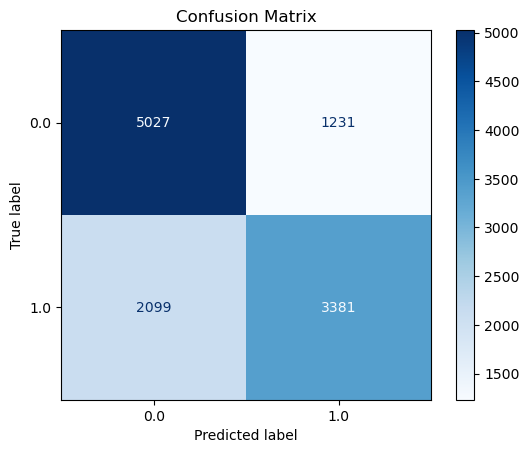

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_nb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_ if hasattr(nb_model, 'classes_') else y_test.unique())
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
